In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 
import os
import math
import seaborn as sns
import operator
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#for training data
data = pd.read_csv('E:\cg.csv')
data.head()
x1 = data['academic']
x2 = data['non academic']
y  = data['cgpa']

X1 = np.array(x1)
X2 = np.array(x2)
Y  = np.array(y)
X = np.vstack((X1, X2)).T
XX = np.add(X1, X2)
XXX = np.vstack((X1,X2, XX)).T

#for testing data
test = pd.read_csv('E:\cgtest.csv')
test.head()
tx1 = test['academic']
tx2 = test['non academic']
yt = test['cgpa']
Tx1 = np.array(tx1)
Tx2 = np.array(tx2)
YT = np.array(yt)
TX = np.vstack((Tx1,Tx2)).T
TXX = np.add(Tx1, Tx2)
TXXX = np.vstack((Tx1,Tx2, TXX)).T

In [3]:
data.describe()
#test.describe()

,academic,non academic,cgpa
count,372.000000,372.000000,372.000000
mean,1.040323,3.723118,3.274704
std,1.215794,2.088656,0.371623
min,0.000000,1.000000,2.050000
25%,0.000000,2.000000,3.000000
50%,1.000000,3.000000,3.270000
75%,1.000000,5.000000,3.562500
max,10.000000,10.000000,4.000000


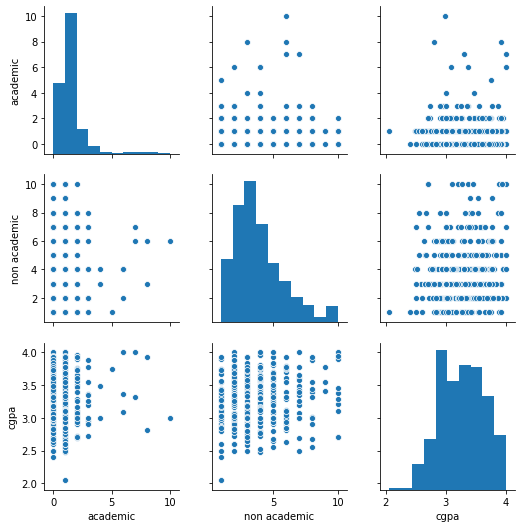

In [4]:
sns.pairplot(data)

In [5]:
x2Pro = []
for i in range(len(x2)):
    t1 =(24-x1[i])
    
    x2Pro.append(t1)

xavg = np.array(x2Pro)

xy = np.vstack((X1,xavg,XX)).T
fitX = np.vstack((xavg,Y)).T



In [6]:
def cg2Grade(cg):
    grade = []
    for i in range(len(cg)):
        if (cg[i]==4.00):
            grade.append('A+')
        elif (cg[i]<4.00 and cg[i]>3.75):
            grade.append('A')
        elif (cg[i]<=3.75 and cg[i]>3.50):
            grade.append('A-')
        elif (cg[i]<=3.50 and cg[i]>3.25):
            grade.append('B+')
        elif (cg[i]<=3.25 and cg[i]>3.00):
            grade.append('B')
        elif (cg[i]<=3.00 and cg[i]>2.75):
            grade.append('B-')
        elif (cg[i]<=2.75 and cg[i]>2.50):
            grade.append('C+')
        elif (cg[i]<=2.50 and cg[i]>2.25):
            grade.append('C')
        elif (cg[i]<=2.25 and cg[i]>2.00):
            grade.append('D')
        else:
            grade.append('F')
    return grade

In [7]:
def c2gpa(cg):
    gpa = []
    for i in range(len(cg)):
        if (cg[i]==4.00):
            gpa.append(4.00)
        elif (cg[i]<4.00 and cg[i]>3.75):
            gpa.append(3.75)
        elif (cg[i]<=3.75 and cg[i]>3.50):
            gpa.append(3.50)
        elif (cg[i]<=3.50 and cg[i]>3.25):
            gpa.append(3.25)
        elif (cg[i]<=3.25 and cg[i]>3.00):
            gpa.append(3.00)
        elif (cg[i]<=3.00 and cg[i]>2.75):
            gpa.append(2.75)
        elif (cg[i]<=2.75 and cg[i]>2.50):
            gpa.append(2.50)
        elif (cg[i]<=2.50 and cg[i]>2.25):
            gpa.append(2.25)
        elif (cg[i]<=2.25 and cg[i]>2.00):
            gpa.append(2.00)
        else:
            gpa.append(0.00)
    return gpa


In [8]:
g = c2gpa(YT)
print(g)

[3.0, 2.5, 3.75, 3.0, 3.25, 4.0, 2.75, 2.75, 2.75, 2.75, 2.5, 2.75, 3.5, 3.75, 3.75, 3.5, 3.0, 2.75, 2.5, 3.5, 3.0, 3.0, 3.0, 3.5, 2.5, 2.5, 3.5, 2.75, 3.0, 2.5, 3.0, 3.0, 2.75, 3.25, 3.0, 2.75, 2.25, 3.0, 3.0, 3.25, 2.5, 3.0, 3.0, 3.5, 3.0, 2.5, 2.75, 2.5, 3.25, 3.25, 3.25, 2.0, 3.25, 3.75, 3.25, 0.0, 2.75, 3.5, 3.25, 2.75, 3.5, 3.25, 3.25, 3.25, 2.75, 3.0, 3.25, 3.25, 3.5, 3.75, 3.75, 2.75, 2.25, 3.5, 4.0, 3.25, 3.75, 2.5, 2.5, 2.75, 3.25, 3.25, 2.75, 2.75, 2.75, 3.5, 2.5, 3.25, 3.5, 2.75, 3.0]


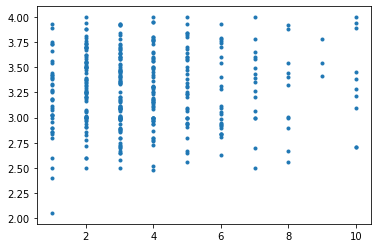

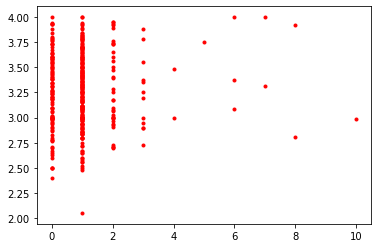

In [9]:
plt.scatter(X2[:],Y[:],marker='.' ) 
plt.show()
plt.scatter(X1[:],Y[:],marker='.',color='red' ) 
plt.show()


In [10]:
reg = LinearRegression().fit(xy, Y)

In [11]:
yT = cg2Grade(YT)
print(len(yT))

91


In [12]:
def predict(inp):    
    cg = reg.predict(inp);
    return cg

In [13]:
cgpa = predict(TXXX)
grad = cg2Grade(cgpa)
accuracy = accuracy_score(yT, grad)*100
print(accuracy)

19.78021978021978


# knn




In [14]:
neigh = KNeighborsRegressor(n_neighbors=2)

In [15]:
neigh.fit(XXX,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [16]:
cgpa=neigh.predict(TXXX)
grad = cg2Grade(cgpa)
accuracy = accuracy_score(yT, grad)*100
print(grad)
print(accuracy)


['B-', 'B+', 'A-', 'B-', 'B+', 'A-', 'B-', 'A-', 'B+', 'B+', 'B-', 'A-', 'A-', 'A-', 'A-', 'B+', 'A-', 'B', 'B-', 'B-', 'B+', 'A-', 'B+', 'A-', 'B', 'A-', 'B+', 'B-', 'A-', 'A-', 'B+', 'B', 'B-', 'B', 'B+', 'B', 'B', 'B-', 'A-', 'B+', 'A-', 'B+', 'B-', 'A-', 'B+', 'B-', 'B+', 'B+', 'B+', 'B', 'B+', 'B', 'B-', 'A', 'B-', 'B+', 'A-', 'A-', 'B+', 'B-', 'A-', 'B+', 'B+', 'A-', 'B', 'A-', 'B', 'A-', 'B+', 'B-', 'B+', 'A-', 'B+', 'B', 'B+', 'B', 'B-', 'B-', 'B+', 'B', 'B', 'B+', 'B-', 'A-', 'B-', 'A-', 'B', 'B-', 'B', 'B-', 'B+']
25.274725274725274


In [19]:
x = int(input('academic: '))
y = int(input('non academic: '))
z = int(input('total: '))
inp = [[x,y,z]]

cgpa1 = predict(inp)
grad1 = cg2Grade(cgpa1)

cgpa2 = neigh.predict(inp)
grad2 = c2gpa(cgpa2)
print(cgpa1,cgpa2)

academic: 1
non academic: 2
total: 3
[3.32052565] [3.565]


In [ ]:
#KNN

In [153]:
neigh = KNeighborsClassifier(n_neighbors=3)
